In [27]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [28]:
# Train dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
# Test dataset
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Network variables
input_size = 28*28
batch_size = 100
h_size = 500
n_classes = 10
lr = 0.001

# Train dataloader
mnist_trainloader = torch.utils.data.DataLoader(dataset=mnist_trainset, shuffle=True, batch_size=batch_size)
# Test dataloader
mnist_testloader = torch.utils.data.DataLoader(dataset=mnist_testset, shuffle=False, batch_size=batch_size)

testing_loader = iter(mnist_trainloader)
curr_batch, labels = next(testing_loader)
print(curr_batch.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


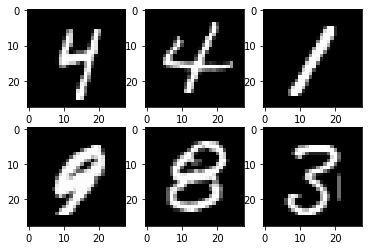

In [35]:
# Show some digits from the MNIST dataset
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(curr_batch[i][0], cmap='gray')
plt.show()

In [36]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, h_size, n_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.lin1 = nn.Linear(input_size, h_size)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(h_size, n_classes)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        return out
    
model = NeuralNet(input_size, h_size, n_classes).to(device)

criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)

In [38]:
n_epochs = 2
n_total_steps = len(mnist_trainloader)

# training
for epoch in range(n_epochs):
    for i, (features, labels) in enumerate(mnist_trainloader):
        # push features and labels to device
        features = features.reshape(-1, 28*28).to(device) # turn features batch from (1000,1,28,28) -> (1000, 784)
        labels = labels.to(device)
        
        # calculate predicted outputs and loss (forward pass)
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # calculate gradients and make update (backwards pass)
        opt.zero_grad()
        loss.backward() # calculate gradients
        opt.step() # make update
        
        if (i+1) % 100 == 0:
            print(f'epoch: {epoch} / {n_epochs}')
            print(f'step: {i+1} / {n_total_steps}')
            print(f'loss: {loss}')
            print('----')
        
# testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for features, labels in mnist_testloader:
        features = features.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outs = model(features)
        
        _, preds = torch.max(outs, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
    
    acc = 100 * n_correct / n_samples
    print(f'accuracy: {acc}')

epoch: 0 / 2
step: 100 / 600
loss: 0.392948716878891
----
epoch: 0 / 2
step: 200 / 600
loss: 0.26778653264045715
----
epoch: 0 / 2
step: 300 / 600
loss: 0.22186681628227234
----
epoch: 0 / 2
step: 400 / 600
loss: 0.41183632612228394
----
epoch: 0 / 2
step: 500 / 600
loss: 0.22210483253002167
----
epoch: 0 / 2
step: 600 / 600
loss: 0.2888299226760864
----
epoch: 1 / 2
step: 100 / 600
loss: 0.2237374484539032
----
epoch: 1 / 2
step: 200 / 600
loss: 0.1204596608877182
----
epoch: 1 / 2
step: 300 / 600
loss: 0.1648293435573578
----
epoch: 1 / 2
step: 400 / 600
loss: 0.16831018030643463
----
epoch: 1 / 2
step: 500 / 600
loss: 0.19494780898094177
----
epoch: 1 / 2
step: 600 / 600
loss: 0.09027978032827377
----
accuracy: 95.27
